## Chapter 9 Moving Average Smoothing

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting.

#### Moving Average Smoothing

There are two main types of moving average that are used: Centered and Trailing Moving Average.

- Centered Moving Average
  - The value at time (t) is calculated as the average of raw observations at, before, and after time (t). For example, a center moving average with a window of 3 would be calculated as: center_ma(t) = mean(obs(t − 1), obs(t), obs(t + 1)).
  - This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.

- Trailing Moving Average
  - The value at time (t) is calculated as the average of the raw observations at and before the time (t). For example, a trailing moving average with a window of 3 would be calculated as: trail_ma(t) = mean(obs(t − 2), obs(t − 1), obs(t)).
  - Trailing moving average only uses historical observations and is used on time series forecasting.

#### Data Expectation

Calculating a moving average of a time series makes some assumptions about your data. *It is assumed that both trend and seasonal components have been removed from your time series. This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure)*.

There are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are to use the differencing method and to model the behavior and explicitly subtract it from the series.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
series = pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [45]:
df = pd.read_csv('data/daily-total-female-births.csv', parse_dates=True)
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


#### Moving Average as Data Preparation

In [47]:
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

,Births
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000
1959-01-06,34.666667
1959-01-07,39.333333
1959-01-08,39.000000
1959-01-09,42.000000


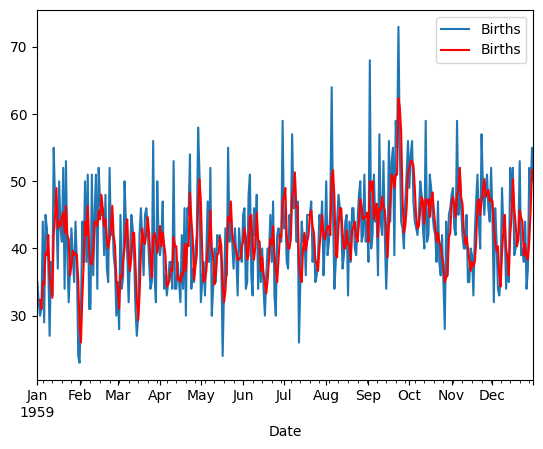

In [48]:
# plot original and transformed dataset
ax = series.plot()
rolling_mean.plot(ax=ax, color='red')
plt.show()

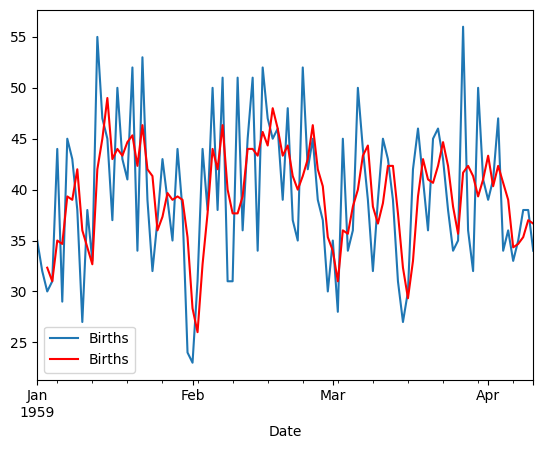

In [49]:
# zoomed plot original and transformed dataset
ax = series[:100].plot()
rolling_mean[:100].plot(ax=ax, color='red')
plt.show()

Here, you can clearly see the *lag* in the transformed dataset.

#### Moving Average as Feature Engineering

In [50]:
# moving average smoothing as feature engineering

In [51]:
width = 3
lag1 = df['Births'].shift(1)
lag3 = df['Births'].shift(width-1)
window = lag3.rolling(window=width)
means = window.mean()
df2 = pd.concat([means, lag1, df['Births']], axis=1)
df2.columns = ['mean', 't', 't+1']
df2.head(10)

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44
5,31.000000,44.0,29
6,35.000000,29.0,45
7,34.666667,45.0,43
8,39.333333,43.0,38
9,39.000000,38.0,27


#### Moving Average as Prediction

The moving average value can also be used directly to make predictions. It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. The moving average model for predictions can easily be used in a walk-forward manner.

/tmp/ipython-input-2368639286.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'predicted={yhat:.3f}, expected={int(obs)}')


predicted=32.333, expected=31
predicted=31.000, expected=44
predicted=35.000, expected=29
predicted=34.667, expected=45
predicted=39.333, expected=43
predicted=39.000, expected=38
predicted=42.000, expected=27
predicted=36.000, expected=38
predicted=34.333, expected=33
predicted=32.667, expected=55
predicted=42.000, expected=47
predicted=45.000, expected=45
predicted=49.000, expected=37
predicted=43.000, expected=50
predicted=44.000, expected=43
predicted=43.333, expected=41
predicted=44.667, expected=52
predicted=45.333, expected=34
predicted=42.333, expected=53
predicted=46.333, expected=39
predicted=42.000, expected=32
predicted=41.333, expected=37
predicted=36.000, expected=43
predicted=37.333, expected=39
predicted=39.667, expected=35
predicted=39.000, expected=44
predicted=39.333, expected=38
predicted=39.000, expected=24
predicted=35.333, expected=23
predicted=28.333, expected=31
predicted=26.000, expected=44
predicted=32.667, expected=38
predicted=37.667, expected=50
predicted=

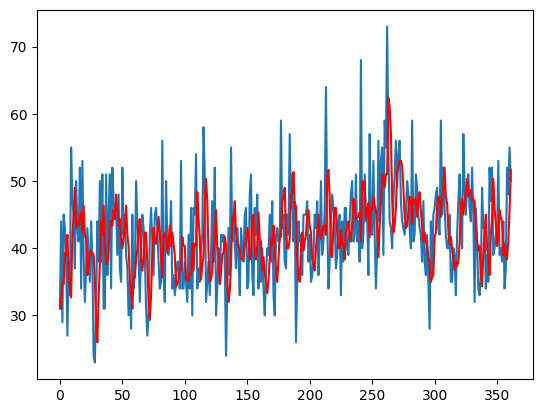

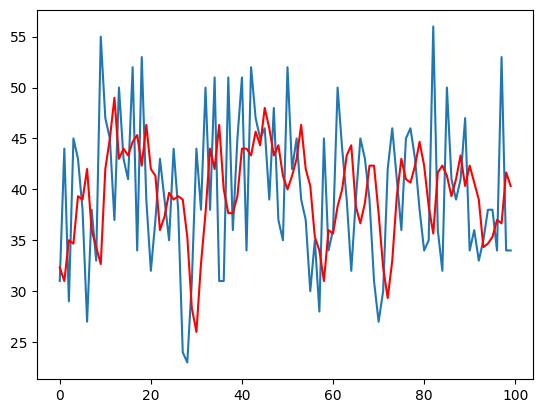

In [54]:
# moving average smoothing as a forecast model
from sklearn.metrics import mean_squared_error
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print(f'predicted={yhat:.3f}, expected={int(obs)}')
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse}')
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[:100])
plt.plot(predictions[:100], color='red')
plt.show()